## Multi-Class Modeling using Train-Test-Split

In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# read in modeling data file
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'Y1', 'Y2']

df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,Y1,Y2
-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,0,9.0,0,0
-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,0,9.0,0,0


In [3]:
df['Y']=df['Y1']+df['Y2']
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f71,f72,f73,f74,f75,f76,f77,Y1,Y2,Y
-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,9.0,0,0,0
-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,9.0,0,0,0


In [4]:
df=df.drop(['Y1','Y2'],axis=1)
df[df.Y==1].head(2)
df.to_csv('data/multiclass_modeling.csv',index=0)

In [5]:
# Splitting up our data into features and targets
X = df.iloc[:, :-1] # Features
Y = df.Y # Target 

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the targets 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Decision Tree

In [6]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019, )

# Train Decision Tree Classifer
dt = dt.fit(X_train_resample,Y_train_resample)

# Predict the target for the test data 
Y_pred = dt.predict(X_test)

In [7]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7837234419315964
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5612
           1       0.83      0.80      0.82      8692
           2       0.17      0.20      0.19      1532

    accuracy                           0.78     15836
   macro avg       0.63      0.63      0.63     15836
weighted avg       0.79      0.78      0.78     15836

[[5017  391  204]
 [ 388 6981 1323]
 [ 163 1055  314]]


In [8]:
# define the feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

f12    0.248876
f25    0.134747
f3     0.134200
f2     0.049363
f0     0.041380
f1     0.035804
f24    0.033656
f77    0.032292
f23    0.031721
f11    0.019286
f8     0.016570
f16    0.016195
f10    0.013812
f7     0.013770
f20    0.013272
f15    0.013149
f9     0.011138
f6     0.010363
f74    0.009167
f32    0.007772
f31    0.007570
f59    0.006380
f64    0.006042
f18    0.005841
f45    0.005061
f26    0.004976
f19    0.004888
f34    0.004835
f55    0.004733
f54    0.004297
         ...   
f53    0.001006
f40    0.000986
f30    0.000932
f68    0.000895
f73    0.000739
f35    0.000682
f72    0.000666
f58    0.000565
f70    0.000556
f41    0.000539
f27    0.000484
f22    0.000482
f60    0.000456
f69    0.000437
f76    0.000419
f63    0.000416
f66    0.000410
f46    0.000387
f71    0.000344
f38    0.000317
f61    0.000288
f43    0.000269
f65    0.000087
f52    0.000066
f21    0.000000
f28    0.000000
f47    0.000000
f5     0.000000
f4     0.000000
f67    0.000000
Length: 78, dtype: float

In [26]:
dfi_dt = pd.DataFrame(feature_imp)
dfi_dt.to_csv('feature_imp/mm_tt_dt.csv')

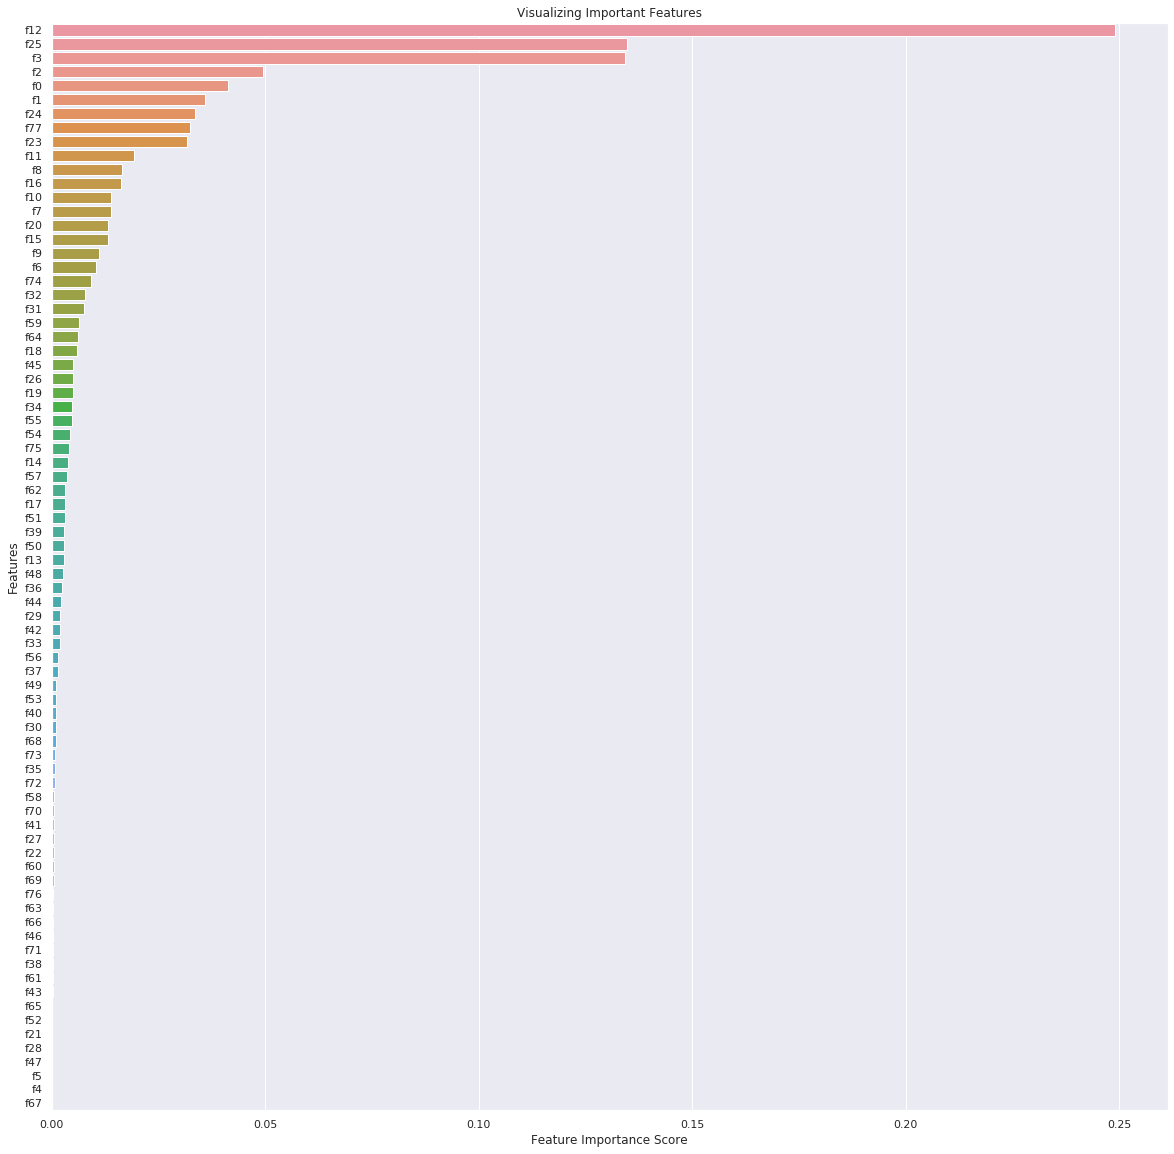

<Figure size 432x288 with 0 Axes>

In [9]:
# visualize the feature importance values 
plt.figure(figsize=(20,20))

# Creating a bar plot
sns.barplot(y=feature_imp.index, x=feature_imp)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

plt.savefig('images/mm_tt_dt_feature_importance.PNG')

## 2. SVM

In [10]:
# define the svm model 
svc = SVC(kernel='rbf', gamma='auto', random_state=2019)

# fit svm model 
svc = svc.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = svc.predict(X_test)

In [11]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7692377495252767
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5612
           1       0.88      0.67      0.76      8692
           2       0.21      0.44      0.29      1532

    accuracy                           0.75     15836
   macro avg       0.66      0.69      0.65     15836
weighted avg       0.82      0.75      0.77     15836

[[5348  132  132]
 [ 518 5802 2372]
 [ 205  649  678]]


### 3. KNeighbors

In [12]:
# define the svm model 
kn = KNeighborsClassifier()

# fit svm model 
kn = kn.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = kn.predict(X_test)

In [13]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7299933834097982
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5612
           1       0.83      0.66      0.74      8692
           2       0.15      0.34      0.21      1532

    accuracy                           0.70     15836
   macro avg       0.62      0.62      0.60     15836
weighted avg       0.78      0.70      0.73     15836

[[4787  392  433]
 [ 518 5772 2402]
 [ 207  808  517]]


### 4. AdaBoost

In [14]:
# define the svm model 
ada = AdaBoostClassifier(random_state=2019)

# fit svm model 
ada = ada.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = ada.predict(X_test)

In [15]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7351233908471068
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5612
           1       0.88      0.58      0.70      8692
           2       0.19      0.50      0.27      1532

    accuracy                           0.71     15836
   macro avg       0.65      0.68      0.63     15836
weighted avg       0.81      0.71      0.74     15836

[[5399  143   70]
 [ 488 5012 3192]
 [ 212  560  760]]


In [16]:
# define the feature importance variable 
ada_feature_imp = pd.Series(ada.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
ada_feature_imp

f25    0.12
f12    0.12
f77    0.10
f3     0.10
f0     0.10
f8     0.06
f22    0.04
f59    0.02
f20    0.02
f19    0.02
f18    0.02
f16    0.02
f15    0.02
f33    0.02
f54    0.02
f57    0.02
f23    0.02
f36    0.02
f10    0.02
f9     0.02
f62    0.02
f7     0.02
f35    0.02
f2     0.02
f1     0.02
f27    0.00
f26    0.00
f29    0.00
f30    0.00
f31    0.00
       ... 
f69    0.00
f68    0.00
f67    0.00
f66    0.00
f65    0.00
f64    0.00
f63    0.00
f61    0.00
f60    0.00
f58    0.00
f56    0.00
f55    0.00
f53    0.00
f51    0.00
f71    0.00
f50    0.00
f49    0.00
f48    0.00
f47    0.00
f46    0.00
f45    0.00
f44    0.00
f43    0.00
f42    0.00
f41    0.00
f40    0.00
f39    0.00
f76    0.00
f37    0.00
f38    0.00
Length: 78, dtype: float64

In [27]:
ada_fi = pd.DataFrame(ada_feature_imp)
ada_fi.to_csv('feature_imp/mm_tt_ada.csv')

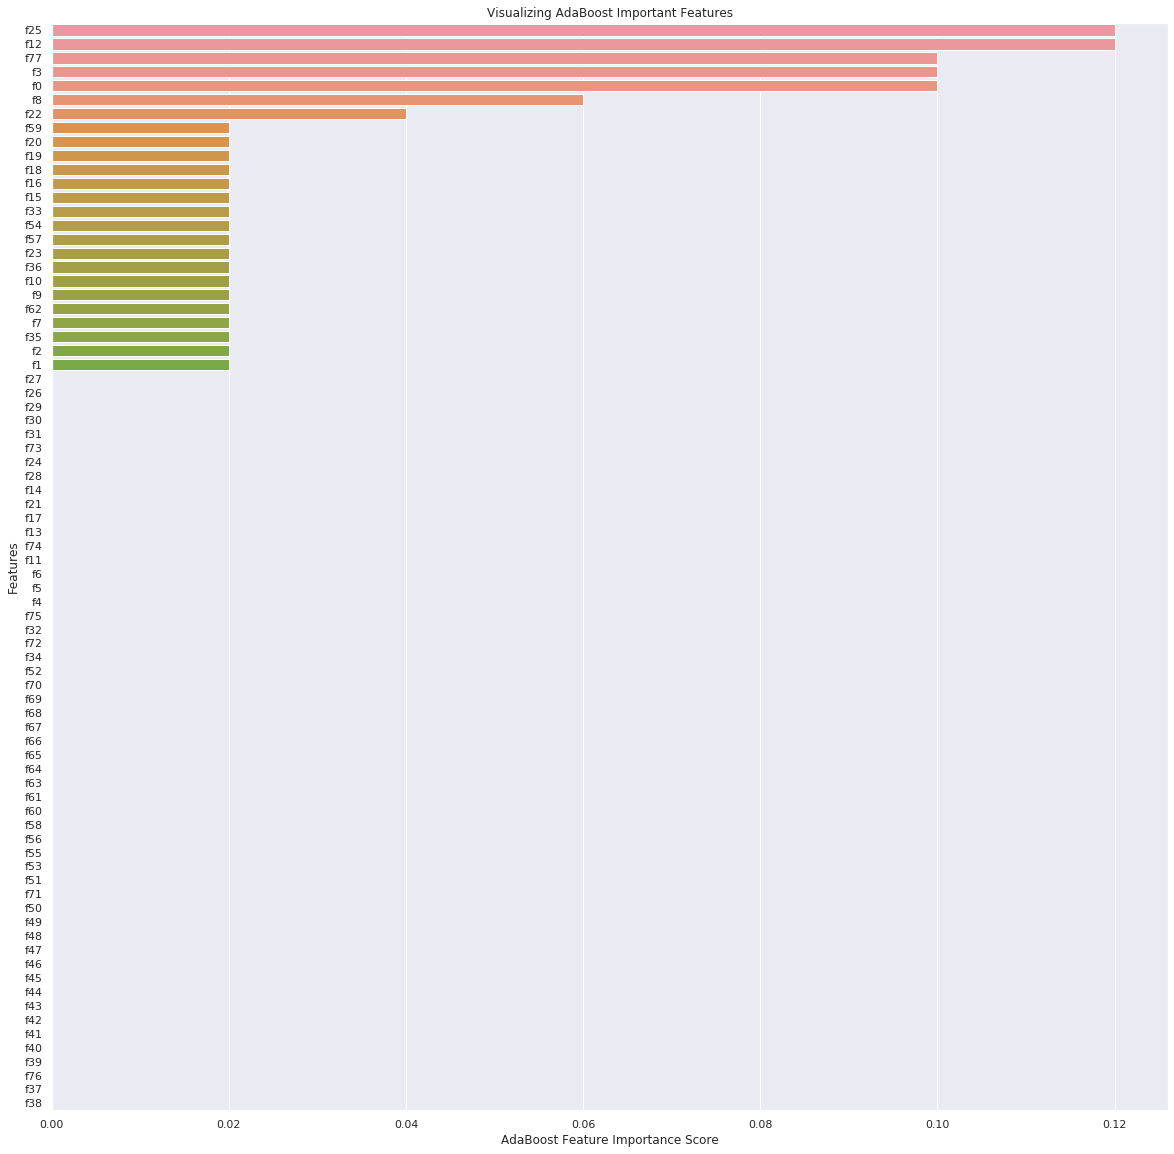

<Figure size 432x288 with 0 Axes>

In [17]:
# visualize the feature importance values 
plt.figure(figsize=(20,20))

# Creating a bar plot
sns.barplot(y=ada_feature_imp.index, x=ada_feature_imp)

# Add labels
plt.xlabel('AdaBoost Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing AdaBoost Important Features")
plt.show()
plt.savefig('images/mm_tt_ada_feature_importance.PNG')

### 5. XGBoost

In [18]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=xg.predict(X_test)

In [19]:
# evluate xgboost
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7726303813846935
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      5612
           1       0.88      0.67      0.76      8692
           2       0.21      0.43      0.29      1532

    accuracy                           0.75     15836
   macro avg       0.66      0.69      0.66     15836
weighted avg       0.82      0.75      0.77     15836

[[5459   98   55]
 [ 522 5788 2382]
 [ 205  662  665]]


In [29]:
# define the feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp

f12    0.398564
f25    0.181801
f14    0.066150
f22    0.045527
f77    0.031963
f20    0.028941
f59    0.021649
f15    0.020418
f2     0.015877
f9     0.015027
f19    0.011442
f1     0.009274
f32    0.008906
f8     0.008817
f23    0.008793
f24    0.008062
f10    0.007363
f30    0.007136
f3     0.006611
f61    0.005658
f75    0.005452
f0     0.004887
f7     0.004777
f31    0.004254
f51    0.004136
f36    0.004037
f16    0.003799
f74    0.003786
f11    0.003741
f6     0.003710
         ...   
f54    0.000658
f37    0.000248
f49    0.000059
f69    0.000000
f71    0.000000
f5     0.000000
f4     0.000000
f67    0.000000
f66    0.000000
f72    0.000000
f55    0.000000
f27    0.000000
f65    0.000000
f64    0.000000
f53    0.000000
f52    0.000000
f50    0.000000
f47    0.000000
f46    0.000000
f45    0.000000
f43    0.000000
f42    0.000000
f40    0.000000
f39    0.000000
f29    0.000000
f28    0.000000
f58    0.000000
f63    0.000000
f21    0.000000
f38    0.000000
Length: 78, dtype: float

In [30]:
dfi_xg = pd.DataFrame(xgb_feature_imp)
dfi_xg.to_csv('feature_imp/mm_tt_xgb.csv')

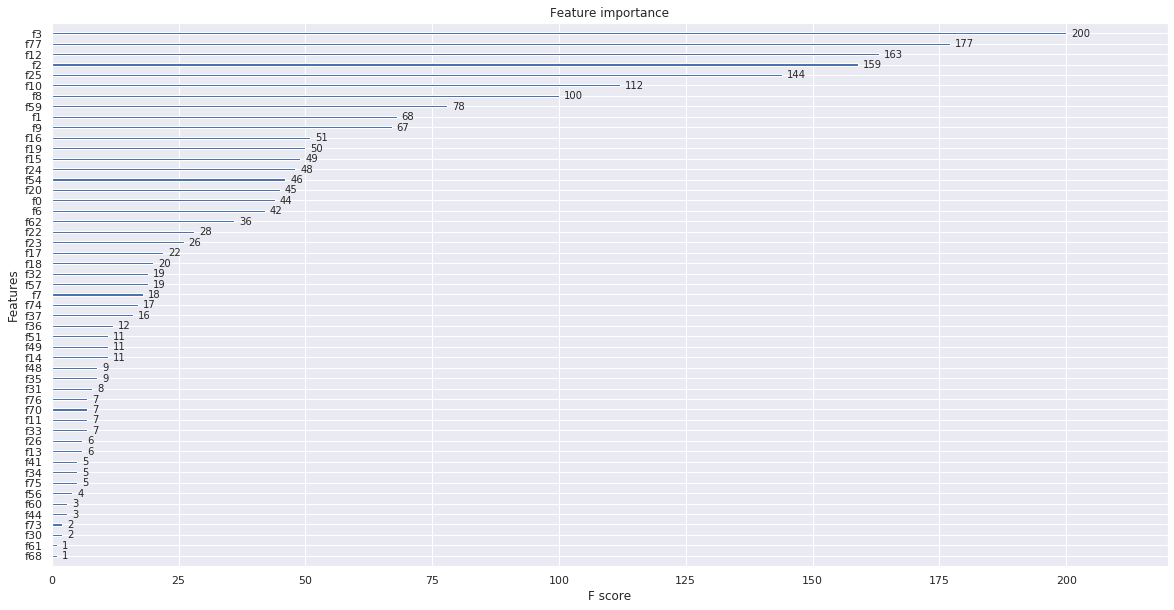

<Figure size 1440x720 with 0 Axes>

In [25]:
# visualize the feature importances according to the xgboost model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()
plt.savefig('images/mm_tt_xgb_feature_importance.PNG')

## 6. Random Forest

In [21]:
# build decision tree 
rf = RandomForestClassifier(n_estimators=100, random_state=2019)

# Train Decision Tree Classifer
rf = rf.fit(X_train_resample, Y_train_resample)

# Predict the target for the test data 
Y_pred = rf.predict(X_test)

In [22]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8170134698700402
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5612
           1       0.84      0.90      0.87      8692
           2       0.22      0.12      0.15      1532

    accuracy                           0.83     15836
   macro avg       0.66      0.65      0.65     15836
weighted avg       0.80      0.83      0.82     15836

[[5228  298   86]
 [ 355 7789  548]
 [ 182 1169  181]]


In [23]:
# define the feature importance variable
rf_feature_imp = pd.Series(rf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
rf_feature_imp

f3     0.163534
f12    0.163315
f77    0.094203
f2     0.058696
f0     0.049692
f1     0.048849
f24    0.035964
f23    0.035674
f25    0.035212
f8     0.020645
f9     0.019849
f15    0.018216
f11    0.018212
f16    0.017425
f10    0.016483
f20    0.016194
f14    0.015660
f7     0.014618
f22    0.014176
f6     0.013843
f18    0.009821
f74    0.008674
f59    0.008360
f32    0.008030
f31    0.006071
f64    0.006043
f19    0.005661
f45    0.005186
f55    0.004861
f26    0.004614
         ...   
f30    0.001334
f35    0.001122
f40    0.001053
f73    0.001040
f68    0.000944
f53    0.000924
f72    0.000896
f49    0.000703
f63    0.000657
f61    0.000524
f70    0.000524
f66    0.000474
f76    0.000468
f71    0.000455
f43    0.000443
f38    0.000431
f58    0.000411
f46    0.000387
f69    0.000382
f41    0.000335
f27    0.000317
f60    0.000307
f28    0.000170
f67    0.000157
f65    0.000104
f52    0.000076
f47    0.000019
f21    0.000000
f5     0.000000
f4     0.000000
Length: 78, dtype: float

In [31]:
dfi_rf = pd.DataFrame(rf_feature_imp)
dfi_rf.to_csv('feature_imp/mm_tt_rf.csv')

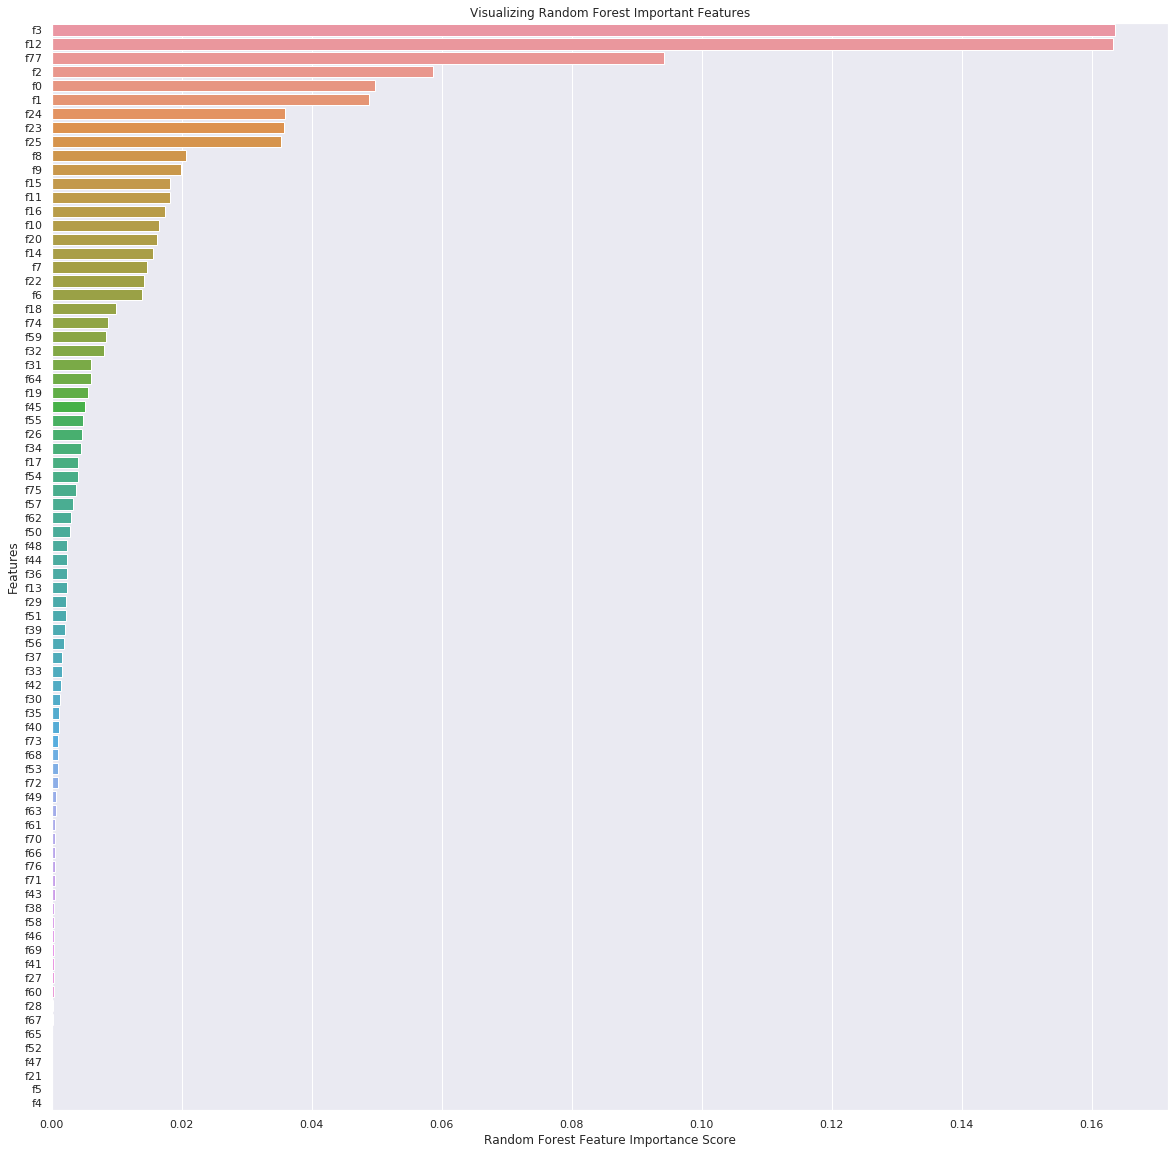

<Figure size 1440x720 with 0 Axes>

In [24]:
# visualize the feature importance values 
plt.figure(figsize=(20,20))

# Creating a bar plot
sns.barplot(y=rf_feature_imp.index, x=rf_feature_imp)

# Add labels
plt.xlabel('Random Forest Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()
plt.savefig('images/mm_tt_rf_feature_importance.PNG')